# Reading JSON data
9.2.2023, Sakari Lukkarinen<br>
Health, Information and Communication Technology<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## Introduction

The aim of this Notebook is to demonstrate how to read in JSON data and make some statistics and graphics.

The data should be generated with `KubiosCloud Demo 2` Notebook and the datas should be stored in `./json` subfolder.

### References

- [Kubioscloud example for authorization](https://bitbucket.org/kubios/workspace/snippets/4X95xd/kubioscloud-example-for-authorization-code)
- [Kubios Cloud API reference](https://analysis.kubioscloud.com/v1/portal/documentation/apis.html#kubioscloud-api-reference)
- [Python JSON](https://www.w3schools.com/python/python_json.asphttps://www.w3schools.com/python/python_json.asp)

## 1. Setup

Import needed modules.

In [1]:
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json

# Set Pandas' display precision to two decimals
pd.options.display.precision = 2

## 2. Read user data

**Note:** You need to enter these values in Kubios HRV app! If they are missing, you get errors.

In [2]:
# Load user data and show some values
with open('./json/user_info.json') as json_file:
    data = json.load(json_file)
user_data = data['user']
print('User data:')
print(f'  height = {user_data["height"]:5} m')
print(f'  weight = {user_data["weight"]:5} kg')
print(f'  hr_max = {user_data["hr_max"]:5} bpm')

User data:
  height =  1.89 m
  weight =    95 kg
  hr_max =   180 bpm


## Read readiness and stress_index data

In [3]:
# Load daily readiness data
with open('./json/all_results.json') as json_file:
    data = json.load(json_file)
results = data['results']

# Collect daily results from the results
daily_result = []
readiness = []
stress_index = []
for n, r in enumerate(results):
    daily_result.append(r['daily_result'])
    readiness.append(r['result']['readiness'])
    stress_index.append(r['result']['stress_index'])

# Create Pandas Dataframe for easier handling
dict = {'time': daily_result,
        'readiness': readiness,
        'stress_index': stress_index}
df = pd.DataFrame(dict)

# Change time to datetime object and set it as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace = True)

In [4]:
# Show 5 last measurements
df.tail(5)

,readiness,stress_index
time,,
NaT,83.81,12.40
2022-03-12,51.35,12.27
NaT,68.17,10.30
2022-03-13,69.07,6.24
2022-03-14,66.96,5.61


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
readiness,87.0,61.06,17.15,11.47,53.63,64.15,69.92,100.00
stress_index,100.0,9.38,2.49,3.42,8.02,9.15,10.72,19.94


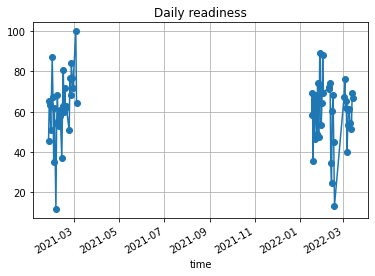

In [6]:
df['readiness'].plot(style = 'o-');
plt.title('Daily readiness')
plt.grid()
plt.show()

## Read measurement results

**NOTE:** You need to change the N.

In [7]:
# Select Nth result
N = 87

# Construct the filenames and display them
details_file = f'./json/r_{N:0=3d}.json'
rr_file = f'./json/r_{N:0=3d}_data.csv'

print(f'Details file = {details_file}')
print(f'RR file      = {rr_file}')

Details file = ./json/r_087.json
RR file      = ./json/r_087_data.csv


In [8]:
# Read the details
with open(details_file) as json_file:
    details = json.load(json_file)
# details
details['daily_result']

### Read HRV measurement

In [9]:
# Read the data file
data = pd.read_csv(rr_file, header = None, names = ['rr'])

# Calculate the heart rate (BPM)
data['heart_rate'] = 60*1000/data['rr']

# Calculate the time (s)
data['time'] = data['rr'].cumsum()/1000

# Display the head
data.head()

,rr,heart_rate,time
0,1014,59.17,1.01
1,990,60.61,2.00
2,978,61.35,2.98
3,989,60.67,3.97
4,925,64.86,4.90


In [10]:
# Calculate the descriptive statistics
data[['rr', 'heart_rate']].describe().T

,count,mean,std,min,25%,50%,75%,max
rr,302.0,992.47,70.22,828.00,938.00,986.00,1044.00,1196.00
heart_rate,302.0,60.75,4.23,50.17,57.47,60.85,63.97,72.46


### Plot Heart rate variablity (HRV)

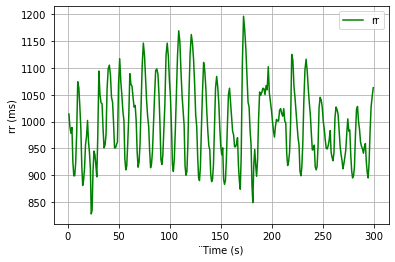

In [11]:
# Sketch a graph of the heart rate variabilty (HRV)
data.plot.line(x = 'time', y = 'rr', style = 'g')
plt.title(details['daily_result'])
plt.ylabel('rr (ms)')
plt.xlabel('¨Time (s)')
plt.grid()
plt.show()

### Plot heart rate (BPM)

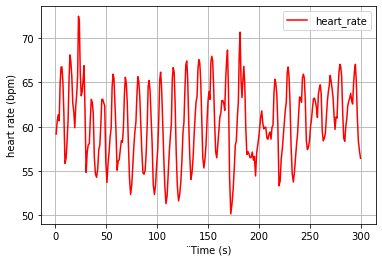

In [12]:
# Sketch a graph of heart rate
data.plot.line(x = 'time', y = 'heart_rate', style = 'r')
plt.title(details['daily_result'])
plt.ylabel('heart rate (bpm)')
plt.xlabel('¨Time (s)')
plt.grid()
plt.show()